In [1]:
import pandas as pd

### 1. Read the file in DataFrame

In [206]:
df =pd.read_csv("cricket.csv")
df

,sr.no,name,matches,runs,catches,wickets,stumpings
0,1,Anil Dalpat,122,6755,56,12,0
1,2,Rohan Kanhay,144,1256,76,178,0
2,3,Avdhoot Dighe,265,8954,120,0,0
3,4,Bahubali,10,756,6,11,3
4,5,Leeladhar,234,2866,105,376,0
5,6,Pradyumna,177,5877,47,122,0
6,7,Dinesh Roy,211,8537,112,16,0
7,8,Parmeshwar,245,9466,53,0,0
8,9,Ali Durrani,55,2756,12,26,0
9,10,Litesh Singh,89,1099,46,49,0


### 2. List the name of cricketer and their respective runs

In [9]:
df.loc[:,['name','runs']]

,name,runs
0,Anil Dalpat,6755
1,Rohan Kanhay,1256
2,Avdhoot Dighe,8954
3,Bahubali,756
4,Leeladhar,2866
5,Pradyumna,5877
6,Dinesh Roy,8537
7,Parmeshwar,9466
8,Ali Durrani,2756
9,Litesh Singh,1099


### 3. Find total wickets taken by them

In [28]:
total_wickets = 0
for n in df['wickets']:
    print(n)
    total_wickets += n
print('Total Wickets taken by cricketers are:', total_wickets)

12
178
0
11
376
122
16
0
26
49
Total Wickets taken by cricketers are: 790


### 4. Find average of catches taken

In [31]:
count = 0
sum = 0
for n in df['catches']:
    print(n)
    count += 1
    sum += n
avg = sum/count
print('Average of catches taken is:', avg)

56
76
120
6
105
47
112
53
12
46
Average of catches taken is: 63.3


### 5. Find the name of wicketkeeper

In [40]:
count = 0
for n in df['stumpings']:
    if n != 0:
        print('Name of the Wicket Keeper is', df.name[count])
        break
    count += 1

Name of the Wicket Keeper is Bahubali


In [75]:
df

,sr.no,name,matches,runs,catches,wickets,stumpings
0,1,Anil Dalpat,122,6755,56,12,0
1,2,Rohan Kanhay,144,1256,76,178,0
2,3,Avdhoot Dighe,265,8954,120,0,0
3,4,Bahubali,10,756,6,11,3
4,5,Leeladhar,234,2866,105,376,0
5,6,Pradyumna,177,5877,47,122,0
6,7,Dinesh Roy,211,8537,112,16,0
7,8,Parmeshwar,245,9466,53,0,0
8,9,Ali Durrani,55,2756,12,26,0
9,10,Litesh Singh,89,1099,46,49,0


### 6. print the name of bowler who played highest number of matches

In [93]:
x = []
df_bowler = df
count = 0
print("List of Bowlers is:")
for n in range(len(df)):
    if df.wickets[count] != 0:
        x.append(df.matches[count])
        df_bowler= df_bowler.drop(count)
        print(df.name[count], df.matches[count])
    count +=1
Max_matches = max(x)
for n in range(len(df)):
    if df.matches[n] == Max_matches:
        print('Name of the bowler who played highest number of matches is', df.name[n])
        break

List of Bowlers is:
Anil Dalpat 122
Rohan Kanhay 144
Bahubali 10
Leeladhar 234
Pradyumna 177
Dinesh Roy 211
Ali Durrani 55
Litesh Singh 89
Name of the bowler who played highest number of matches is Leeladhar


In [180]:
#### List of Only Bowlers
df_bowler = df
count = 0
for n in range(len(df)):
    if df.wickets[count] == 0 or df.stumpings[count] != 0:
        df_bowler= df_bowler.drop(count)
    count +=1
df_bowler

,sr.no,name,matches,runs,catches,wickets,stumpings
0,1,Anil Dalpat,122,6755,56,12,0
1,2,Rohan Kanhay,144,1256,76,178,0
4,5,Leeladhar,234,2866,105,376,0
5,6,Pradyumna,177,5877,47,122,0
6,7,Dinesh Roy,211,8537,112,16,0
8,9,Ali Durrani,55,2756,12,26,0
9,10,Litesh Singh,89,1099,46,49,0


In [182]:
Max_matches = df_bowler['matches'].max()
for n in range(len(df_bowler)):
    if df.matches[n] == Max_matches:
        print('Name of the bowler who played highest number of matches is', df.name[n])
        break

Name of the bowler who played highest number of matches is Leeladhar


### 7. Find average of all the bowlers

In [185]:
sum = df_bowler['runs'].sum()
avg_bowlers = sum / len(df_bowler)
print('Average of all the Bowlers is: %0.3f' %(avg_bowlers))

Average of all the Bowlers is: 4163.714


### 8. Find name of the bowler with least bowling average (wickets per match).

In [187]:
df_bowler = df_bowler.drop('stumpings',axis=1)
df_bowler.loc[:,'average']= pd.Series(df_bowler.wickets/df_bowler.matches, index=df_bowler.index)
df_bowler

,sr.no,name,matches,runs,catches,wickets,average
0,1,Anil Dalpat,122,6755,56,12,0.098361
1,2,Rohan Kanhay,144,1256,76,178,1.236111
4,5,Leeladhar,234,2866,105,376,1.606838
5,6,Pradyumna,177,5877,47,122,0.689266
6,7,Dinesh Roy,211,8537,112,16,0.075829
8,9,Ali Durrani,55,2756,12,26,0.472727
9,10,Litesh Singh,89,1099,46,49,0.550562


In [199]:
#df_bowler = df_bowler.reset_index()
avg_min = df_bowler['average'].min()
len(df_bowler)
for n in range(len(df_bowler)) :
    if df_bowler.average[n] == avg_min:
        print('The bowler with least bowling average is', df_bowler.name[n])
        break

The bowler with least bowling average is Dinesh Roy


### 9. Print information about all players whose catches per match ratio is greater than 0.5 store it in a csv file.

In [212]:
df.loc[:,'AvgCatch']= pd.Series(df.catches/df.matches, index=df.index)
df

,sr.no,name,matches,runs,catches,wickets,stumpings,AvgCatch
0,1,Anil Dalpat,122,6755,56,12,0,0.459016
1,2,Rohan Kanhay,144,1256,76,178,0,0.527778
2,3,Avdhoot Dighe,265,8954,120,0,0,0.452830
3,4,Bahubali,10,756,6,11,3,0.600000
4,5,Leeladhar,234,2866,105,376,0,0.448718
5,6,Pradyumna,177,5877,47,122,0,0.265537
6,7,Dinesh Roy,211,8537,112,16,0,0.530806
7,8,Parmeshwar,245,9466,53,0,0,0.216327
8,9,Ali Durrani,55,2756,12,26,0,0.218182
9,10,Litesh Singh,89,1099,46,49,0,0.516854


In [220]:
#### CM_ratio = catch/Match ratio
df_cm = df
for n in range(len(df_cm)):
    if df_cm.AvgCatch[n] < 0.500:
        df_cm = df_cm.drop(n)
df_cm

,sr.no,name,matches,runs,catches,wickets,stumpings,AvgCatch
1,2,Rohan Kanhay,144,1256,76,178,0,0.527778
3,4,Bahubali,10,756,6,11,3,0.600000
6,7,Dinesh Roy,211,8537,112,16,0,0.530806
9,10,Litesh Singh,89,1099,46,49,0,0.516854


In [224]:
#df_cm = df_cm.reset_index()
df_cm
df_cm.to_csv('AvgCatch.csv', index=False)

In [239]:
df

,sr.no,name,matches,runs,catches,wickets,stumpings,AvgCatch
0,1,Anil Dalpat,122,6755,56,12,0,0.459016
1,2,Rohan Kanhay,144,1256,76,178,0,0.527778
2,3,Avdhoot Dighe,265,8954,120,0,0,0.452830
3,4,Bahubali,10,756,6,11,3,0.600000
4,5,Leeladhar,234,2866,105,376,0,0.448718
5,6,Pradyumna,177,5877,47,122,0,0.265537
6,7,Dinesh Roy,211,8537,112,16,0,0.530806
7,8,Parmeshwar,245,9466,53,0,0,0.216327
8,9,Ali Durrani,55,2756,12,26,0,0.218182
9,10,Litesh Singh,89,1099,46,49,0,0.516854


### 10. Draw the bar chart of playr name against their runs.

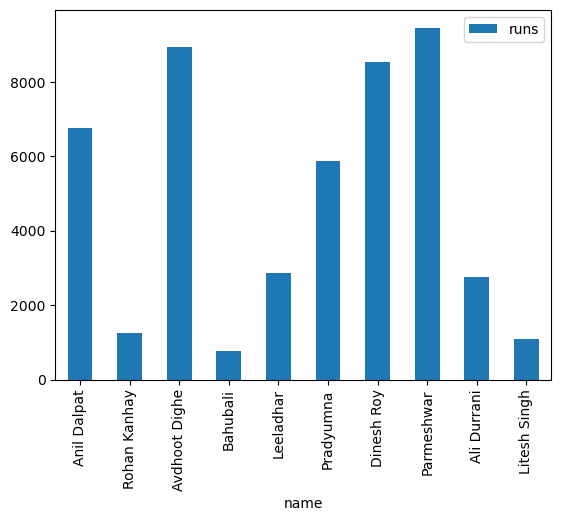

In [249]:
ax = df.plot.bar(x='name', y='runs')

### 11. Sort and print information about players by ascending order of runs

In [243]:
df.sort_values(by=['runs'])

,sr.no,name,matches,runs,catches,wickets,stumpings,AvgCatch
3,4,Bahubali,10,756,6,11,3,0.600000
9,10,Litesh Singh,89,1099,46,49,0,0.516854
1,2,Rohan Kanhay,144,1256,76,178,0,0.527778
8,9,Ali Durrani,55,2756,12,26,0,0.218182
4,5,Leeladhar,234,2866,105,376,0,0.448718
5,6,Pradyumna,177,5877,47,122,0,0.265537
0,1,Anil Dalpat,122,6755,56,12,0,0.459016
6,7,Dinesh Roy,211,8537,112,16,0,0.530806
2,3,Avdhoot Dighe,265,8954,120,0,0,0.452830
7,8,Parmeshwar,245,9466,53,0,0,0.216327


### 12. print the names of players whose wickets are greater than matches

In [241]:
for n in range(len(df)):
    if df.wickets[n] > df.matches[n]:
        print(df.name[n])

Rohan Kanhay
Bahubali
Leeladhar
